In [1]:
%matplotlib notebook

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pylab
from scipy.io import loadmat
from scipy.optimize import fmin_cg

<IPython.core.display.Javascript object>


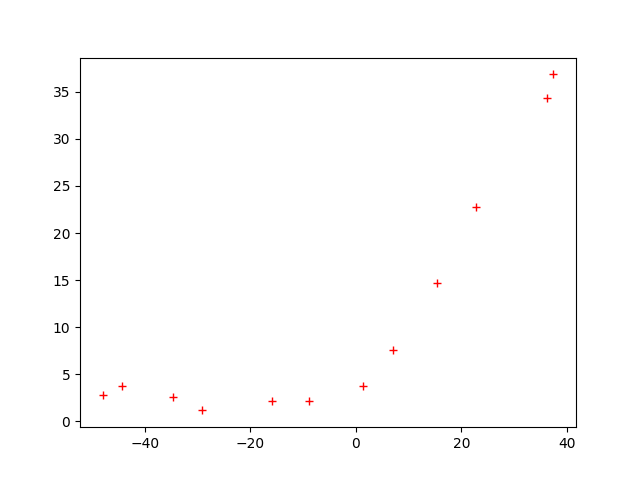

In [2]:
# =========== Part 1: Loading and Visualizing Data =============
#  We start the exercise by first loading and visualizing the dataset. 
#  The following code will load the dataset into your environment and plot
#  the data.

ex5data1 = loadmat('ex5data1.mat')

X = ex5data1['X']
Xval = ex5data1['Xval']
Xtest = ex5data1['Xtest']
y = ex5data1['y']
yval = ex5data1['yval']
ytest = ex5data1['ytest']

Xones = np.c_[np.ones((len(X))), X]
Xvalones = np.c_[np.ones((len(Xval))), Xval]

plt.figure()
plt.plot(X,y,'r+')

In [3]:
# =========== Part 2: Regularized Linear Regression Cost =============
#  You should now implement the cost function for regularized linear 
#  regression. 


def linearRegCostFunction(theta, X, y, lamb):
    h = np.matmul(X, theta)
    thetas = theta[1:]
    m = len(X)

    return (1/(2*m)) * np.sum(np.power((h-y.T), 2)) +  (lamb / (2*m)) * sum(np.power(thetas,2))

theta = np.asarray([1, 1])
J = linearRegCostFunction(theta, Xones, y, 1);

print('Cost at theta = [1 ; 1]: ' + str(J) + ' \n(this value should be about 303.993192)');

Cost at theta = [1 ; 1]: 303.99319222 
(this value should be about 303.993192)


In [4]:
# =========== Part 3: Regularized Linear Regression Gradient =============
#  You should now implement the gradient for regularized linear 
#  regression.

def calculateGradient(theta, X, y, lamb):
    h = np.matmul(X, theta)
    m = len(X)
    
    thetas = np.array(theta, copy=True)
    thetas[0] = 0
    
    return (1/m) * np.sum(np.multiply(X, (h-y.T).T), axis=0) + np.multiply((lamb/m), thetas.T)
    
    
grad = calculateGradient(theta, Xones, y, 1)
print('Gradient at theta = [1 ; 1]: ['+ str(grad[0]) +'; '+ str(grad[1]) +']\n(this value should be about [-15.303016; 598.250744])\n');

Gradient at theta = [1 ; 1]: [-15.3030156742; 598.250744173]
(this value should be about [-15.303016; 598.250744])



[ 13.08790351   0.36777923]


<IPython.core.display.Javascript object>


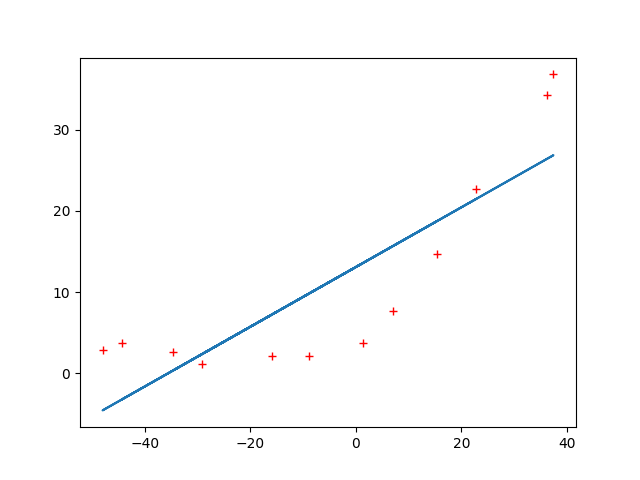

In [5]:
# =========== Part 4: Train Linear Regression =============
#  Once you have implemented the cost and gradient correctly, the
#  trainLinearReg function will use your cost function to train 
#  regularized linear regression.
# 
#  Write Up Note: The data is non-linear, so this will not give a great 
#                 fit.
#

#  Train linear regression with lambda = 0
lamb = 0

def trainLinearReg(X, y, lamb):
    initial_theta = [0] * X.shape[1]
    return fmin_cg(linearRegCostFunction, initial_theta, fprime=calculateGradient, args=(X, y, lamb), maxiter=200, disp=False)

trained_theta = trainLinearReg(Xones, y, lamb)
print(trained_theta)

plt.figure()
plt.plot(X, y,'r+')
plt.plot(X, np.matmul(Xones, trained_theta))

<IPython.core.display.Javascript object>


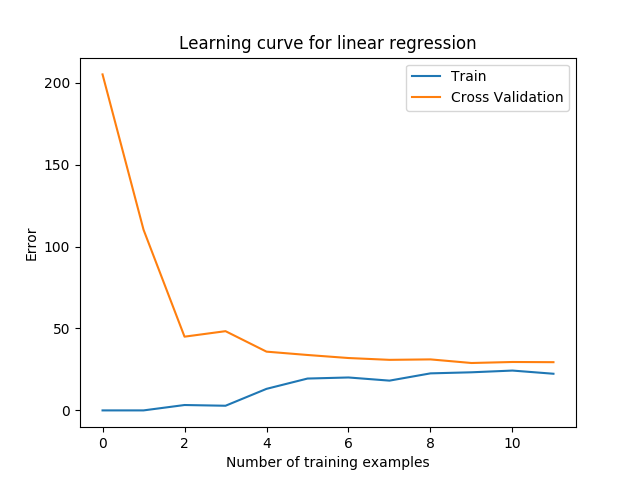

In [6]:
# =========== Part 5: Learning Curve for Linear Regression =============
#  Next, you should implement the learningCurve function. 
#
#  Write Up Note: Since the model is underfitting the data, we expect to
#                 see a graph with "high bias" -- Figure 3 in ex5.pdf 

def learningCurve(Xones, y, Xvalones, yval, lamb):
    m = len(Xones)
    error_train = np.zeros(m)
    error_val = np.zeros(m)
    
    for i in range(m):
        train_X = Xones[:i+1,:]
        train_Y = y[:i+1,:]
        trained_theta = trainLinearReg(train_X, train_Y, lamb)
        
        error_train[i] = linearRegCostFunction(trained_theta, train_X, train_Y,  lamb)
        error_val[i] = linearRegCostFunction(trained_theta, Xvalones, yval, lamb)
    
    return (error_train, error_val)


lamb = 0
error_train, error_val = learningCurve(Xones, y, Xvalones, yval, lamb)

s = np.arange(len(error_train))
plt.figure()
plt.title('Learning curve for linear regression')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.plot(s, error_train, label='Train')
plt.plot(s, error_val, label='Cross Validation')
plt.legend()

In [7]:
# =========== Part 6: Feature Mapping for Polynomial Regression =============
#  One solution to this is to use polynomial regression. You should now
#  complete polyFeatures to map each example into its powers

def polyFeatures(X, p):
    ret = np.zeros([len(X), p])
    for i in range(1, p+1):
        ret[:,i-1] = np.power(X, i)[:,0]
        
    return ret

p = 8
X_poly_origin = polyFeatures(X, p)

def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1)
    X_norm = np.divide(np.subtract(X, mu), sigma)
    
    return (X_norm, mu, sigma)

X_poly_normalized, mu, sigma = featureNormalize(X_poly_origin)
X_poly = np.c_[np.ones((len(X_poly_normalized))), X_poly_normalized]

In [8]:
# Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(Xtest, p)
X_poly_test = np.subtract(X_poly_test, mu)
X_poly_test = np.divide(X_poly_test, sigma)
X_poly_test = np.c_[np.ones((len(X_poly_test))), X_poly_test]

In [9]:
# Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(Xval, p)
X_poly_val = np.subtract(X_poly_val, mu)
X_poly_val = np.divide(X_poly_val, sigma)
X_poly_val = np.c_[np.ones((len(X_poly_val))), X_poly_val]

<IPython.core.display.Javascript object>


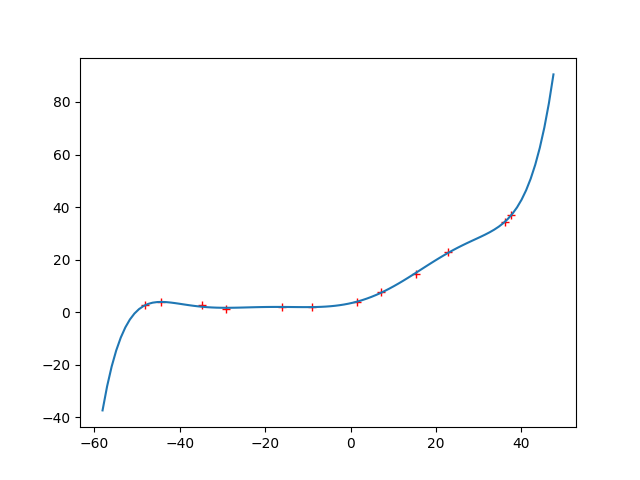

In [13]:
# =========== Part 7: Learning Curve for Polynomial Regression =============
#  Now, you will get to experiment with polynomial regression with multiple
#  values of lambda. The code below runs polynomial regression with 
#  lambda = 0. You should try running the code with different values of
#  lambda to see how the fit and learning curve change.

lamb = 0
trained_theta = trainLinearReg(X_poly, y, lamb)
plt.figure()
plt.plot(X, y,'r+')

def plotFit(minX, maxX, mu, sigma, theta, p):
    x = np.array([np.linspace(np.min(X)-10, np.max(X)+10, 100)]).T
    X_poly = polyFeatures(x, p)
    X_poly = np.subtract(X_poly, mu)
    X_poly = np.divide(X_poly, sigma)
    X_poly = np.c_[np.ones((len(X_poly))), X_poly]
    plt.plot(x, np.matmul(X_poly, theta))

plotFit(np.min(X), np.max(X), mu, sigma, trained_theta, p)